In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Etykiety klas:', np.unique(y))

Etykiety klas: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)

In [4]:
# test 'stratify' czy faktycznie rozkłada etykiety
# w takich samych proporcjach
print('Liczba etykiet w zbiorze: y:', np.bincount(y))
print('Liczba etykiet w zbiorze: y_train:', np.bincount(y_train))
print('Liczba etykiet w zbiorze: y_test:', np.bincount(y_test))

Liczba etykiet w zbiorze: y: [50 50 50]
Liczba etykiet w zbiorze: y_train: [35 35 35]
Liczba etykiet w zbiorze: y_test: [15 15 15]


In [5]:
# standaryzacja zbiorów (transform)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# sc.fit oblicza wartość średnią próbek 
# oraz odchylenie standardowe
sc.fit(X_train)
# transform - standaryzacja danych
# na podstawie wartości obliczonych dzięki fit
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print("Nieprawidłowo sklasyfikowane próbki:", (y_test != y_pred).sum())

Nieprawidłowo sklasyfikowane próbki: 2


In [7]:
from sklearn.metrics import accuracy_score
print("Dokładność: %.2f" % accuracy_score(y_test, y_pred))

Dokładność: 0.96


In [8]:
# inna metoda obliczania accuracy
print("Dokładność: %.2f" % ppn.score(X_test_std, y_test))

Dokładność: 0.96


In [9]:
# zobaczymy jak wygląda granica przebiegająca między etykietami
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):

    # konfiguracja generatora znaczników i mapy kolorów

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # wykresy powierzchni decyzyjnej
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # narysuj wykres z próbkami

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=colors[idx],
            marker=markers[idx], label=cl,
            edgecolor='black')

    # zaznacz próbki testowe
    if test_idx:
        # rysuj wykres wszystkich próbek
        X_test, y_Test = X[list(test_idx), :], y[list(test_idx)]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black',
        alpha=1.0, linewidth=1, marker='o', edgecolors='k',
        s=100, label='Zestaw testowy')


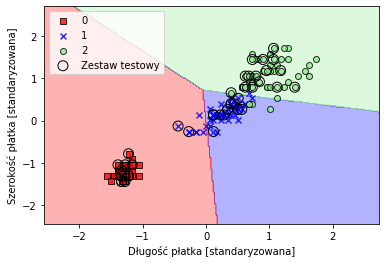

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined, 
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('Długość płatka [standaryzowana]')
plt.ylabel('Szerokość płatka [standaryzowana]')
plt.legend(loc='upper left')
plt.show()